## EDA on Flights Data

In this project, we are going to perforn EDA on Flights Sample Data from Seaborn library

In [54]:
## Importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
## Loading the sample Dataset from Seaborn
df = sns.load_dataset("flights")

In [56]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [57]:
## Distribution of number of passengers Monthwise
Month_wise_passengers = df.groupby("month")["passengers"].sum().reset_index()
Month_wise_passengers


C:\Users\balus\AppData\Local\Temp\ipykernel_30692\1016505803.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Month_wise_passengers = df.groupby("month")["passengers"].sum().reset_index()


,month,passengers
0,Jan,2901
1,Feb,2820
2,Mar,3242
3,Apr,3205
4,May,3262
5,Jun,3740
6,Jul,4216
7,Aug,4213
8,Sep,3629
9,Oct,3199


'Jul & Aug are the months where highest number of passengers have travelled'

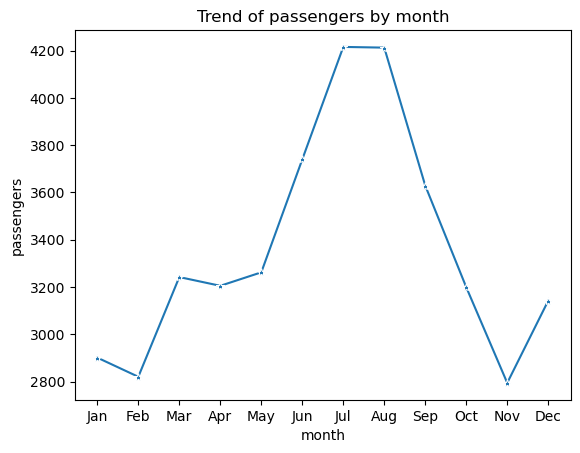

In [58]:
sns.lineplot(x="month",y="passengers",data=Month_wise_passengers,marker="*")
plt.title("Trend of passengers by month")
'''Jul & Aug are the months where highest number of passengers have travelled'''

In [59]:
## Distribution of number of passengers Yearwise
Year_wise_passengers = df.groupby("year")["passengers"].sum().reset_index()
Year_wise_passengers


,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


'The number of passengers have increased every year'

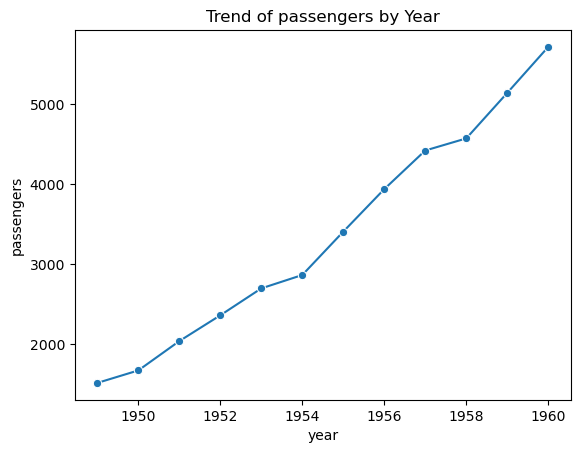

In [60]:
sns.lineplot(x="year",y="passengers",data=Year_wise_passengers,marker="o")
plt.title("Trend of passengers by Year")
'''The number of passengers have increased every year'''

In [61]:
# Calculate YoY growth (% change from previous year)
Year_wise_passengers["YOY Growth %"] = (Year_wise_passengers["passengers"].\
pct_change()*100).round(2)

In [62]:
'''Highest YOY growth was from 1950 to 1951 (21.84)
Least YOY growth was from 1957 to 1958 (3.42)'''
Year_wise_passengers

,year,passengers,YOY Growth %
0,1949,1520,NaN
1,1950,1676,10.26
2,1951,2042,21.84
3,1952,2364,15.77
4,1953,2700,14.21
5,1954,2867,6.19
6,1955,3408,18.87
7,1956,3939,15.58
8,1957,4421,12.24
9,1958,4572,3.42


'Passengers follow right Skewed distribution -\n More number of flights have taken less number of passengers'

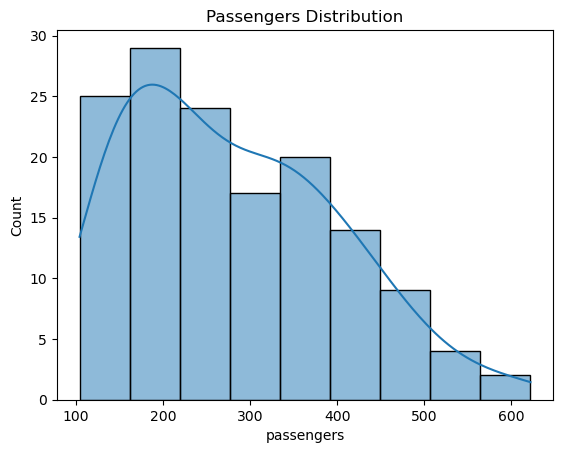

In [63]:
## Plotting histogram of Passengers
sns.histplot(x="passengers",data=df,kde=True)
plt.title("Passengers Distribution")
'''Passengers follow right Skewed distribution -
 More number of flights have taken less number of passengers'''

In [64]:
## Distribution of passengers by Month & year
passengers_by_Year_Month = df.pivot_table(values="passengers",index="year",columns="month")
passengers_by_Year_Month

C:\Users\balus\AppData\Local\Temp\ipykernel_30692\2497274895.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  passengers_by_Year_Month = df.pivot_table(values="passengers",index="year",columns="month")


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0
1950,115.0,126.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0,133.0,114.0,140.0
1951,145.0,150.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0,162.0,146.0,166.0
1952,171.0,180.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0,191.0,172.0,194.0
1953,196.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0,211.0,180.0,201.0
1954,204.0,188.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0,229.0,203.0,229.0
1955,242.0,233.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0,274.0,237.0,278.0
1956,284.0,277.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0,306.0,271.0,306.0
1957,315.0,301.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0,347.0,305.0,336.0


Text(0.5, 1.0, 'Distribution of passengers by Year & Month')

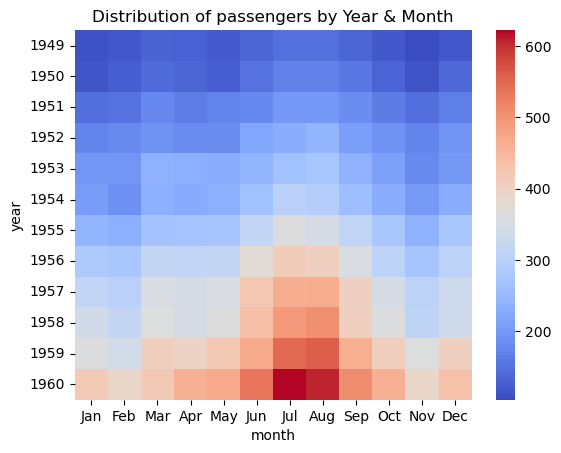

In [65]:
'''Jul & Aug months of 1960 have the hoghest number of passengers'''
sns.heatmap(data=passengers_by_Year_Month,cmap="coolwarm")
plt.title("Distribution of passengers by Year & Month")

## Thank you